## 기초데이터과학 (01분반) 

## Programming assignment 07

### 1. 학생 성적 데이터를 분석해보세요.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 학생 성적 데이터 생성
np.random.seed(42)
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
math_score = study_hours * 8 + np.random.normal(0, 5, 10)
science_score = study_hours * 7.5 + np.random.normal(0, 8, 10)
english_score = np.random.normal(70, 10, 10)

students_df = pd.DataFrame({
    'Study_Hours': study_hours,
    'Math_Score': math_score,
    'Science_Score': science_score,
    'English_Score': english_score
})

print(students_df)

   Study_Hours  Math_Score  Science_Score  English_Score
0            1   10.483571       3.792658      84.656488
1            2   15.308678      11.274162      67.742237
2            3   27.238443      24.435698      70.675282
3            4   39.615149      14.693758      55.752518
4            5   38.829233      23.700657      64.556173
5            6   46.829315      40.501700      71.109226
6            7   63.896064      44.397351      58.490064
7            8   67.837174      62.513979      73.756980
8            9   69.652628      60.235807      63.993613
9           10   82.712800      63.701570      67.083063


#### 1-1. 조건에 따라 학습시간과 수학점수의 관계를 보여주는 산점도를 시각화하세요.
- x축 레이블은 Study Hours, y축 레이블은 Math Score로 설정하세요.
- 제목은 Study Hours vs Math Score으로 설정하세요.
- 점의 색상은 blue, 크기는 50으로 설정하세요.
- 산점도에 격자 무늬를 생성하세요. 모양은 -- 으로 설정하고, 투명도는 0.3으로 설정하세요.

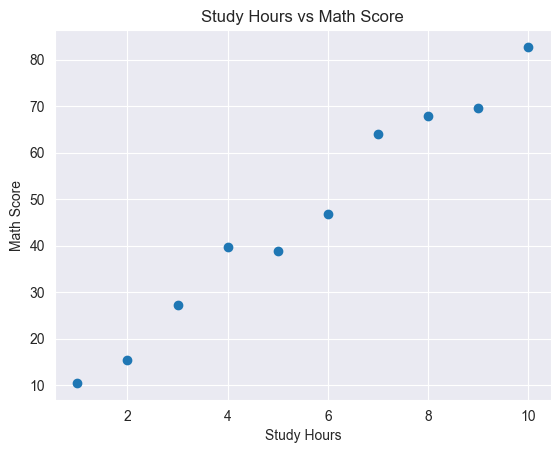

In [18]:
# 산점도 시각화
plt.scatter(students_df['Study_Hours'],students_df['Math_Score'])

# 레이블 및 제목 설정
plt.title("Study Hours vs Math Score")
plt.xlabel('Study Hours')
plt.ylabel('Math Score')

# 격자 무늬 추가
plt.grid(True)

# 산점도 출력
plt.show()


#### 1-2. 피어슨 상관계수를 계산하는 함수를 정의하고 이를 이용하여 상관계수를 계산해보세요. 
- corr() 함수를 쓰지 않고 직접 계산하세요.

In [19]:
# 피어슨 상관계수 계산 함수 정의, 직접 계산
def pearson_corr(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x) * (y - mean_y))
    std_dev_x = np.sqrt(np.sum((x - mean_x)**2))
    std_dev_y = np.sqrt(np.sum((y - mean_y)**2))

    # 분모가 0이 되는 경우 방지
    if std_dev_x == 0 or std_dev_y == 0:
        return 0

    correlation = covariance / (std_dev_x * std_dev_y)
    return correlation

# Study_Hours와 각 과목 간의 상관계수 계산
corr_math = pearson_corr(students_df['Study_Hours'], students_df['Math_Score'])
corr_science = pearson_corr(students_df['Study_Hours'], students_df['Science_Score'])
corr_english = pearson_corr(students_df['Study_Hours'], students_df['English_Score'])

# 결과 출력
print(f"Study Hours와 Math Score 간의 Pearson 상관계수: {corr_math:.4f}")
print(f"Study Hours와 Science Score 간의 Pearson 상관계수: {corr_science:.4f}")
print(f"Study Hours와 English Score 간의 Pearson 상관계수: {corr_english:.4f}")

Study Hours와 Math Score 간의 Pearson 상관계수: 0.9890
Study Hours와 Science Score 간의 Pearson 상관계수: 0.9642
Study Hours와 English Score 간의 Pearson 상관계수: -0.3477


#### 1.3 위에서 정의한 함수를 활용하여 상관관계 행렬을 만들고, 어떤 과목이 학습시간과 가장 강한 상관관계를 갖는지 확인하세요.
- corr() 함수를 쓰지 않고 직접 계산하세요.

In [20]:
# 상관계수 행렬(Correlation Matrix) 생성, 직접 계산
# 1. 빈 데이터프레임 생성
columns = students_df.columns
corr_matrix = pd.DataFrame(index=columns, columns=columns)

# 2. 각 열 쌍에 대해 피어슨 상관계수 계산 및 채우기
for col1 in columns:
    for col2 in columns:
        correlation = pearson_corr(students_df[col1], students_df[col2])
        corr_matrix.loc[col1, col2] = correlation

print("\n상관관계 행렬:")
# 출력 (소수점 4자리까지 보기 좋게)
print(corr_matrix.astype(float).round(4))

# 가장 강한 상관관계 확인
# 1. 학습시간과의 상관계수만 추출
study_hours_corr = corr_matrix['Study_Hours'].drop('Study_Hours').astype(float)

print("\nStudy_Hours와 각 과목 간의 상관계수:")
print(study_hours_corr)

# 2. 학습 시간을 제외하고 절대값이 가장 큰 상관계수 찾기
strongest_corr_subject = study_hours_corr.abs().idxmax()
strongest_corr_value = study_hours_corr[strongest_corr_subject]

print(f"\nStudy_Hours와 가장 강한 상관관계를 갖는 과목: {strongest_corr_subject} (상관계수: {strongest_corr_value:.4f})")


상관관계 행렬:
               Study_Hours  Math_Score  Science_Score  English_Score
Study_Hours         1.0000      0.9890         0.9642        -0.3477
Math_Score          0.9890      1.0000         0.9490        -0.3923
Science_Score       0.9642      0.9490         1.0000        -0.1801
English_Score      -0.3477     -0.3923        -0.1801         1.0000

Study_Hours와 각 과목 간의 상관계수:
Math_Score       0.988960
Science_Score    0.964223
English_Score   -0.347706
Name: Study_Hours, dtype: float64

Study_Hours와 가장 강한 상관관계를 갖는 과목: Math_Score (상관계수: 0.9890)


### 2. Iris 데이터셋을 분석하세요. (Seaborn)

In [21]:
import seaborn as sns

# Iris 데이터셋 로드
iris = sns.load_dataset("iris")

# 데이터프레임 정보 출력
print(iris.head())
print(type(iris))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>


#### 2.1 숫자형 변수(sepal..., petal...) 4개의 피어슨 상관행렬을 계산하세요

In [22]:
from sklearn.datasets import load_iris # 대체 로드

# Iris 데이터셋 로드
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
# 컬럼명을 seaborn에서 로드한 것과 동일하게 맞춤
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# species 컬럼 추가
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = [target_names[target] for target in iris_data.target]

print(iris.head()) # 데이터 확인

# 숫자형 데이터 열만 선택
numeric_cols_iris = iris.select_dtypes(include=[np.number])

# 피어슨 상관계수 계산
pearson_matrix_iris = numeric_cols_iris.corr(method='pearson')
print("\n피어슨 상관계수 행렬:")
print(pearson_matrix_iris)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

피어슨 상관계수 행렬:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


#### 2.2 구한 상관계수행렬을 히트맵으로 시각화해보세요.
- 제목은 Correlation Heatmap으로 하세요.

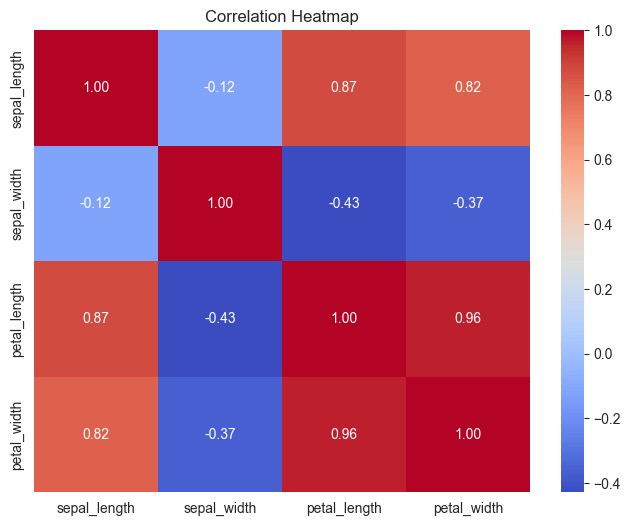

In [35]:
# 히트맵
plt.figure(figsize=(8, 6))
# annot=True: 숫자 표시, cmap='coolwarm': 색상 테마, fmt='.2f': 소수점 2자리
sns.heatmap(pearson_matrix_iris, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
# plt.savefig('problem_2_2_heatmap.png')
# plt.close()
plt.show()

#### 2.3 다중 산점도를 그려보세요. 모든 숫자형 변수 쌍의 산점도를 그려야 합니다.
- 모든 그래프의 색깔은 green, 투명도 0.5로 설정해야 합니다.
- https://seaborn.pydata.org/generated/seaborn.pairplot.html 참고
- 다중 산점도의 제목은 Pairplot of Numeric Features로 설정하세요.(위치 주의)
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html 참고

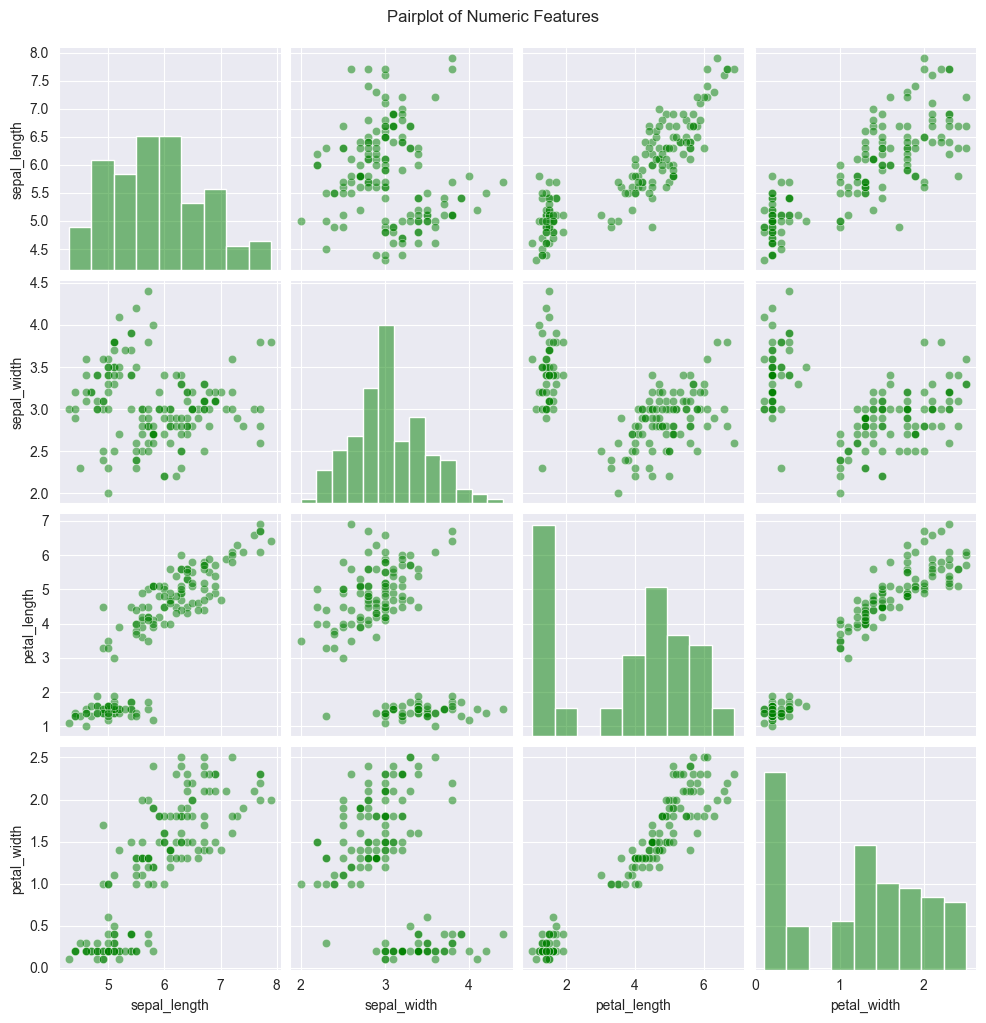

In [36]:
# Pairplot 그리기
# 문제의 요구사항(색상 green, 투명도 0.5)을 적용
g = sns.pairplot(iris, vars=numeric_cols_iris.columns,
                 plot_kws={'color': 'green', 'alpha': 0.5},
                 diag_kws={'color': 'green', 'alpha': 0.5})
# 제목 추가 (y=1.02는 제목이 플롯과 겹치지 않게 위로 올려줌)
g.fig.suptitle('Pairplot of Numeric Features', y=1.02)
# plt.savefig('problem_2_3_pairplot.png')
# plt.close()
plt.show()

### 3. 시험 성적 데이터를 분석해보세요.

In [25]:
import pandas as pd

# 순위 데이터 생성
exam_df = pd.DataFrame({
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Midterm_Score': [85, 92, 78, 95, 88, 76, 90, 82, 87, 91],
    'Final_Score': [88, 95, 75, 98, 85, 80, 92, 84, 90, 89]
})

print(exam_df)

  Student  Midterm_Score  Final_Score
0       A             85           88
1       B             92           95
2       C             78           75
3       D             95           98
4       E             88           85
5       F             76           80
6       G             90           92
7       H             82           84
8       I             87           90
9       J             91           89


#### 3-1. 중간고사 점수와 기말고사 점수를 바탕으로 중간고사 순위, 기말고사 순위 열을 추가하세요.
- 열 이름을 Midterm_Rank, Final_Rank로 설정하세요.
- 중간고사 순위로 정렬하여 출력하고, 잘 정렬되었는지 확인해보세요.

In [26]:
# 순위 추가
# ascending=False는 점수가 높을수록 순위가 높음(1등)을 의미
exam_df['Midterm_Rank'] = exam_df['Midterm_Score'].rank(ascending=False)
exam_df['Final_Rank'] = exam_df['Final_Score'].rank(ascending=False)

# 결과 출력
print(exam_df)

# 순위별로 정렬하여 확인
exam_df_sorted = exam_df.sort_values(by='Midterm_Rank')
print("\nMidterm Rank로 정렬:")
print(exam_df_sorted)

  Student  Midterm_Score  Final_Score  Midterm_Rank  Final_Rank
0       A             85           88           7.0         6.0
1       B             92           95           2.0         2.0
2       C             78           75           9.0        10.0
3       D             95           98           1.0         1.0
4       E             88           85           5.0         7.0
5       F             76           80          10.0         9.0
6       G             90           92           4.0         3.0
7       H             82           84           8.0         8.0
8       I             87           90           6.0         4.0
9       J             91           89           3.0         5.0

Midterm Rank로 정렬:
  Student  Midterm_Score  Final_Score  Midterm_Rank  Final_Rank
3       D             95           98           1.0         1.0
1       B             92           95           2.0         2.0
9       J             91           89           3.0         5.0
6       G            

#### 3-2. 중간고사, 기말고사 점수에 대해 피어슨 상관계수와 스피어만 상관계수를 각각 계산하고 출력하세요.
- lib 활용
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 참고

In [27]:
# 피어슨 상관계수 계산 함수, lib 활용
pearson_corr_exam = exam_df['Midterm_Score'].corr(exam_df['Final_Score'], method='pearson')

# 스피어만 상관계수 계산 함수, lib 활용
spearman_corr_exam = exam_df['Midterm_Score'].corr(exam_df['Final_Score'], method='spearman')

print(f"피어슨 상관계수: {pearson_corr_exam:.4f}")
print(f"스피어만 상관계수: {spearman_corr_exam:.4f}")

피어슨 상관계수: 0.9176
스피어만 상관계수: 0.9030


#### 3-3. 순위 기반 산점도를 그리세요.
- x축은 Midterm Rank, y축은 Final Rank의 산점도 입니다.
- 제목은 'Midterm vs Final Rank Rrelation'으로 설정하세요.
- 각 점에 Student 이름을 표시해보세요.
    - plt.annotate를 활용
    - 필요 parameter: text, xy, xytext, textcoords
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html를 참고
- 격자 무늬를 생성하세요. 모양은 -- 으로 설정하고, 투명도는 0.3으로 설정하세요.
- 산점도의 가시성을 위해 축 방향을 반전하세요.
    - plt.gca(): get current axes로 현재 axes를 가져옵니다.
    - 가져온 axes에 특정 함수를 적용해보세요. 축 방향이 반전됩니다.
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.invert_yaxis.html를 참고

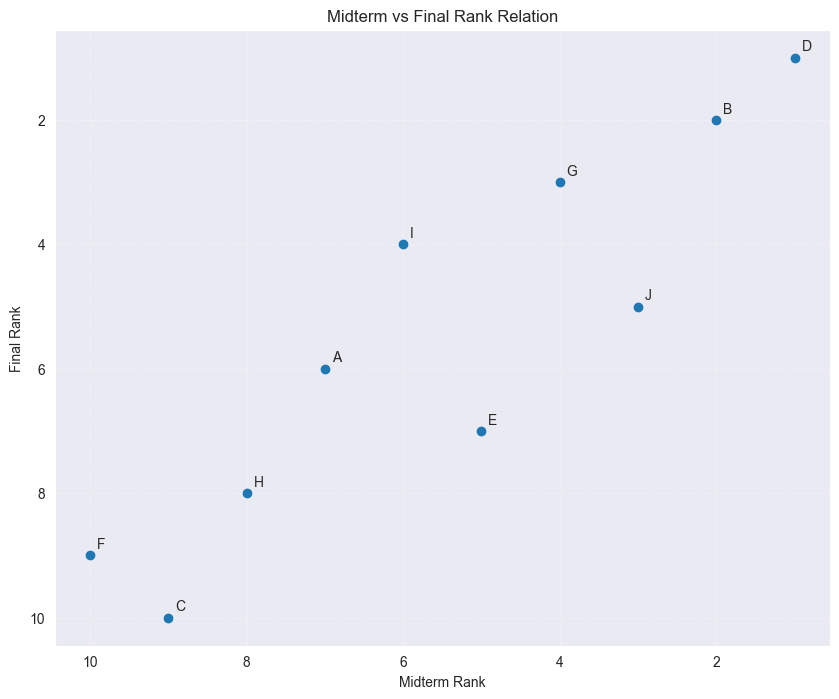

In [37]:
# 순위 기반 산점도 그리기
plt.figure(figsize=(10, 8)) # 플롯 크기 설정
plt.scatter(exam_df['Midterm_Rank'], exam_df['Final_Rank'])

# 레이블 및 제목 설정
plt.xlabel('Midterm Rank')
plt.ylabel('Final Rank')
plt.title('Midterm vs Final Rank Relation')

# 각 점에 학생 이름 표시
for i, row in exam_df.iterrows():
    plt.annotate(row['Student'], # 표시할 텍스트
                 (row['Midterm_Rank'], row['Final_Rank']), # 점의 위치 (x, y)
                 xytext=(5, 5), # 텍스트가 표시될 위치 (점으로부터 x, y 오프셋)
                 textcoords='offset points') # 오프셋 단위

# 격자 무늬 추가
plt.grid(True, linestyle='--', alpha=0.3)

# 축 방향 반전 (순위가 낮을수록(1등) 좋으므로 왼쪽 상단에 표시)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# plt.savefig('problem_3_3_rank_scatter.png')
# plt.close()
plt.show()

### 4. 이상치가 상관관계에 미치는 영향을 분석해보세요.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 생성 (이상치 포함)
np.random.seed(44)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = x * 2 + np.random.normal(0, 1, 10)

# 정상 데이터
normal_df = pd.DataFrame({'X': x, 'Y': y})

# 이상치 추가
outlier_df = normal_df.copy()
outlier_df = pd.concat([outlier_df, pd.DataFrame({'X': [11], 'Y': [5]})], ignore_index=True)

print("정상 데이터:")
print(normal_df)
print("\n이상치 포함 데이터:")
print(outlier_df)

정상 데이터:
    X          Y
0   1   1.249385
1   2   5.316357
2   3   7.246140
3   4   6.395084
4   5   8.531856
5   6  10.284930
6   7  15.858784
7   8  16.087588
8   9  17.947678
9  10  20.555472

이상치 포함 데이터:
     X          Y
0    1   1.249385
1    2   5.316357
2    3   7.246140
3    4   6.395084
4    5   8.531856
5    6  10.284930
6    7  15.858784
7    8  16.087588
8    9  17.947678
9   10  20.555472
10  11   5.000000


#### 4-1. 정상 데이터와 이상치 포함 데이터에 대해 각각 피어슨 상관관계를 구해보세요.

In [30]:
# 정상 데이터의 상관계수
corr_normal = normal_df['X'].corr(normal_df['Y'], method='pearson')

# 이상치 포함 데이터의 상관계수
corr_outlier = outlier_df['X'].corr(outlier_df['Y'], method='pearson')

print(f"\n정상 데이터의 피어슨 상관계수: {corr_normal:.4f}")
print(f"\n이상치 포함 데이터의 피어슨 상관계수: {corr_outlier:.4f}")

# 상관계수 변화 분석
change = corr_normal - corr_outlier
percent_change = (change / corr_normal) * 100
print(f"상관계수 변화: {corr_normal:.4f} -> {corr_outlier:.4f}")
print(f"감소량: {change:.4f}")
print(f"감소율: {percent_change:.2f}%")


정상 데이터의 피어슨 상관계수: 0.9786

이상치 포함 데이터의 피어슨 상관계수: 0.6684
상관계수 변화: 0.9786 -> 0.6684
감소량: 0.3102
감소율: 31.70%


#### 4-2. 정상 데이터의 산점도를 그려보세요.
- 점 색깔: blue
- 회귀선 색깔: dark blue

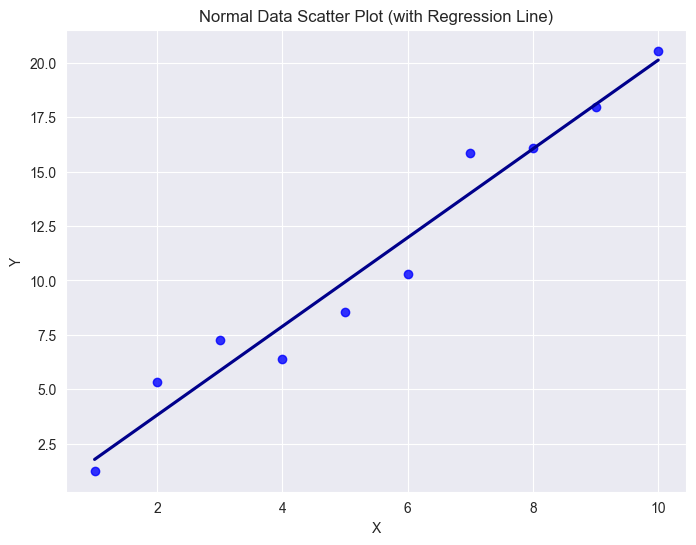

In [38]:
# 정상 데이터 산점도
plt.figure(figsize=(8, 6))
sns.regplot(data=normal_df, x='X', y='Y',
            scatter_kws={'color': 'blue'}, # 산점도 색상
            line_kws={'color': 'darkblue'}, # 회귀선 색상
            ci=None) # 신뢰구간 표시 안 함
plt.title('Normal Data Scatter Plot (with Regression Line)')
# plt.savefig('problem_4_2_normal_scatter.png')
# plt.close()
plt.show()

#### 4-3. 이상치 포함 데이터의 산점도를 그려보세요.
- 점 색깔: blue
- 회귀선 색깔: darkblue
- 이상치 데이터 포인트 색깔: red

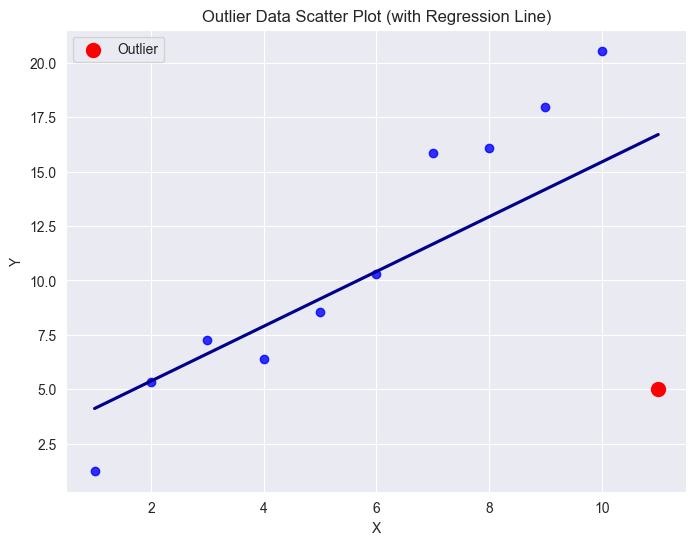

In [40]:
# 이상치 포함 데이터 산점도
plt.figure(figsize=(8, 6))
sns.regplot(data=outlier_df, x='X', y='Y',
            scatter_kws={'color': 'blue'}, # 기본 점 색상
            line_kws={'color': 'darkblue'}, # 회귀선 색상
            ci=None) # 신뢰구간 표시 안 함

# 이상치 데이터 포인트 강조 (빨간색)
outlier_point = outlier_df.iloc[-1] # 마지막 데이터가 이상치
plt.scatter(outlier_point['X'], outlier_point['Y'],
            color='red', s=100, label='Outlier', zorder=5) # zorder로 다른 점 위에 표시

plt.title('Outlier Data Scatter Plot (with Regression Line)')
plt.legend()
# plt.savefig('problem_4_3_outlier_scatter.png')
# plt.close()
plt.show()